# Logistic Regression Project 1
 Titanic Data Set from Kaggle

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data = pd.read_csv('titanic_train.csv')

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data.info()
#data missing in age and cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


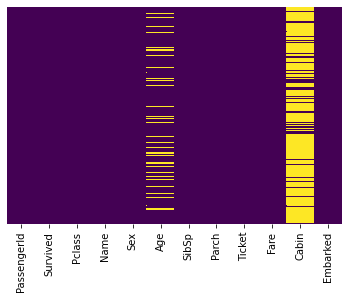

In [35]:
#EDA
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

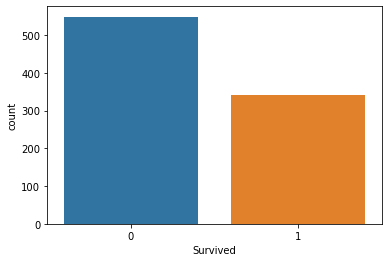

In [36]:
sns.countplot(x='Survived',data=data)

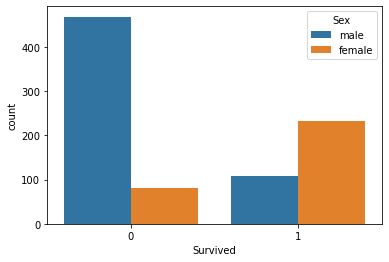

In [37]:
sns.countplot(x='Survived',hue='Sex',data=data)

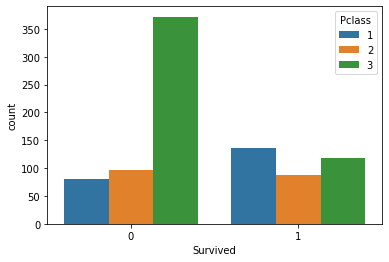

In [38]:
sns.countplot(x='Survived',hue='Pclass',data=data)

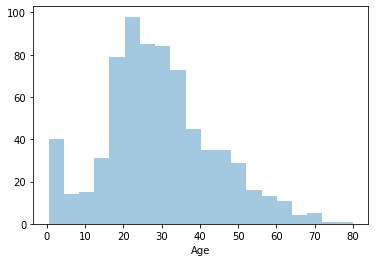

In [39]:
sns.distplot(data['Age'].dropna(),kde=False)

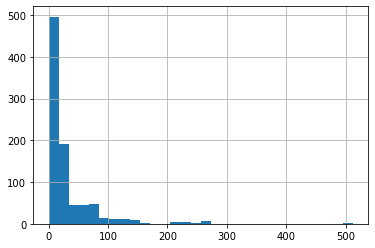

In [40]:
data['Fare'].hist(bins = 30)

In [41]:
#data cleaning
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [42]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

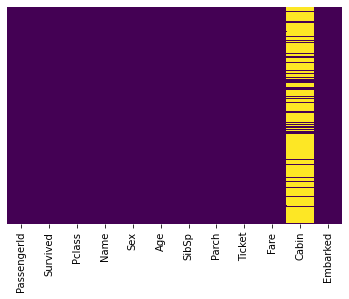

In [43]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
data.drop('Cabin',axis=1,inplace=True)

In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [47]:
#convert objects embark , sex to dummy variables 
#drop remaing objects

In [48]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [49]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [50]:
data = pd.concat([data,sex,embark],axis=1)

In [52]:
data.drop('PassengerId',axis =1,inplace =True)

In [84]:
#modelling
from sklearn.model_selection import train_test_split
X = data.drop('Survived',axis =1)
y= data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=50)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logr = LogisticRegression()

In [87]:
logr.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
logr_predict = logr.predict(X_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print(classification_report(y_test,logr_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       162
           1       0.81      0.71      0.75       106

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



In [91]:
print(confusion_matrix(y_test,logr_predict))

[[144  18]
 [ 31  75]]
